In [1]:
import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [2]:
img_size = 28
space = 2

In [3]:
def plot_tiles(ax, data_img, no_rows, no_cols, img_size=28 , space=2):
    
    image = np.empty(shape=(no_rows * (img_size+space) - space, no_cols * (img_size+2) - space))
    image.fill(np.nan)

    for i in range(no_rows):
        for j in range(no_cols):
            x, y = j*(img_size+space), i*(img_size+space)
            min_v, max_v = np.min(data_img[i,j]), np.max(data_img[i,j])
            image[y:y+img_size,x:x+img_size] = (data_img[i,j]-min_v)/(max_v-min_v)

    ax.matshow(image, cmap='gray', interpolation='none')
    ax.axis('off')

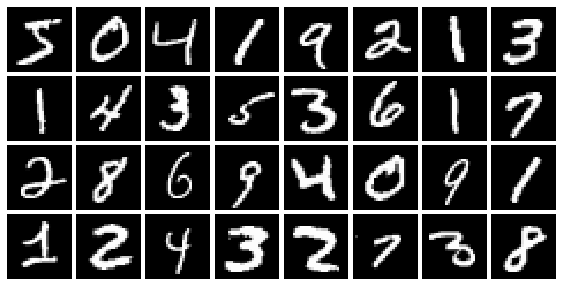

In [4]:
fig = plt.figure(figsize=(10, 5))
plot_tiles(plt.gca(), np.reshape(mnist.train_images()[:4*8], newshape=(4, 8, img_size, img_size)), 4, 8)
plt.show()

In [5]:
train_images = mnist.train_images().astype(np.float32) / 255.0
train_labels = mnist.train_labels()

order = np.random.permutation(len(train_images))

train_images = train_images[order]
train_labels = train_labels[order]

train_images = np.reshape(train_images,newshape=(-1, img_size**2))

In [6]:
test_images = mnist.test_images().astype(np.float32) / 255.0
test_labels = mnist.test_labels()

test_images = np.reshape(test_images, newshape=(-1, img_size**2))

In [7]:
print(len(test_labels))

10000


In [8]:
recognition_model = keras.Sequential()

recognition_model.add(keras.layers.Dense(450,'relu'))
recognition_model.add(keras.layers.Dense(10,'softmax'))


In [9]:
recognition_model.compile('adam','sparse_categorical_crossentropy',['accuracy'])

In [10]:
recognition_model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2064 - accuracy: 0.9391
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0813 - accuracy: 0.9754
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0525 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0375 - accuracy: 0.9882
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0266 - accuracy: 0.9915


In [11]:
recognition_model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0637 - accuracy: 0.9810


[0.06368202716112137, 0.9810000061988831]

In [12]:
test_predictions = recognition_model.predict(test_images).argmax(axis=1)

conf_matrix = tf.math.confusion_matrix(test_labels,test_predictions)

313/313 [==============================] - 0s 1ms/step


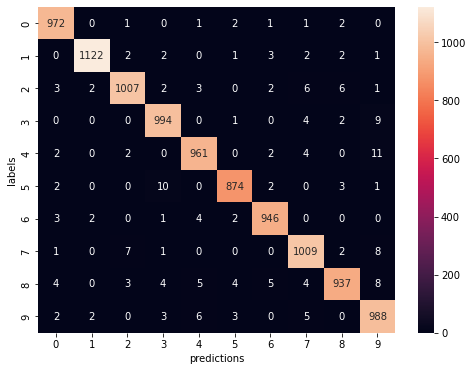

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel("predictions")
plt.ylabel("labels")
plt.show()